<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/BMWSalesDatasetMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [32]:
from google.colab import files
raw_data=files.upload()

Saving BMW sales data (2010-2024).csv to BMW sales data (2010-2024) (1).csv


In [58]:
df=pd.read_csv('BMW sales data (2010-2024).csv')

In [34]:
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


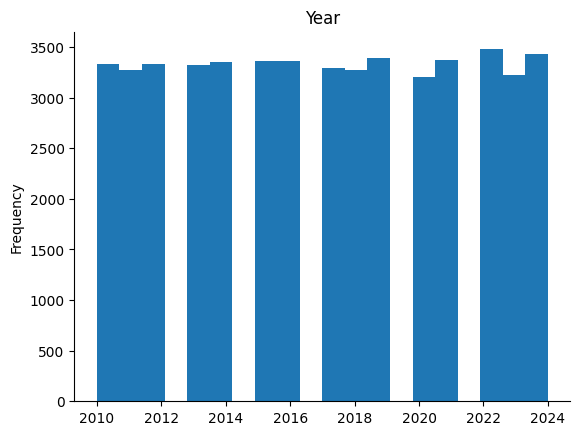

In [35]:
# @title Year

from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [59]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [60]:
df.tail()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,77492,1764,Low


In [38]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [39]:
df.sum().isnull()

,0
Model,False
Year,False
Region,False
Color,False
Fuel_Type,False
Transmission,False
Engine_Size_L,False
Mileage_KM,False
Price_USD,False
Sales_Volume,False


In [40]:
df.count()

,0
Model,50000
Year,50000
Region,50000
Color,50000
Fuel_Type,50000
Transmission,50000
Engine_Size_L,50000
Mileage_KM,50000
Price_USD,50000
Sales_Volume,50000


In [55]:
df.shape

(50000, 11)

In [56]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
target_column = "Sales_Classification"

In [63]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [64]:
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

In [65]:
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [48]:
X

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,1,2016,1,3,3,1,3.5,151748,98740,8300
1,10,2013,4,3,2,0,1.6,121671,79219,3428
2,1,2022,4,1,3,0,4.5,10991,113265,6994
3,6,2024,3,1,3,0,1.7,27255,60971,4047
4,2,2020,5,0,0,1,2.1,122131,49898,3080
...,...,...,...,...,...,...,...,...,...,...
49995,9,2014,1,3,2,1,4.6,151030,42932,8182
49996,9,2023,3,4,1,1,4.2,147396,48714,9816
49997,1,2010,3,3,3,0,4.5,174939,46126,8280
49998,9,2020,1,5,1,0,3.8,3379,58566,9486


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [51]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))



Logistic Regression
Accuracy Score: 0.9988
Confusion Matrix:
 [[3024    8]
 [   4 6964]]
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


SVM
Accuracy Score: 0.9958
Confusion Matrix:
 [[3017   15]
 [  27 6941]]
Classification Report:
               precision    recall  f1-score   support

        High       0.99      1.00      0.99      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       0.99      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


KNN
Accuracy Score: 0.9577
Confusion Matrix:
 [[2835  197]
 [ 226 6742]]
Classification Report:
               precision    recall  f

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [67]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))



Logistic Regression
Accuracy Score: 0.9993
Confusion Matrix:
 [[3027    5]
 [   2 6966]]
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


SVM
Accuracy Score: 0.9946
Confusion Matrix:
 [[3003   29]
 [  25 6943]]
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


KNN
Accuracy Score: 0.9371
Confusion Matrix:
 [[2738  294]
 [ 335 6633]]
Classification Report:
               precision    recall  f